<a href="https://colab.research.google.com/github/Zachary-Fernandes/CSCI-6962/blob/main/fernazHW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 4
#####Zachary Fernandes
#####Projects in Machine Learning and AI

### The Problem

The problem I wanted to understand was predicting the value of one troy ounce of gold in United States Dollars over a specific number of days. To do this, I needed a [time-series dataset](https://www.kaggle.com/datasets/jishnukoliyadan/gold-price-1979-present?select=Daily_Gold_Price_on_World.csv) covering the daily price of gold in 19 different currencies from 1979 to 2022. I need sequence models to solve this problem because the value of gold is inherently tied to the time-series data. The value of gold can change over time, and the way it changes depends on specific trends and patterns that can only be illustrated through time data that must be kept in the same order. I will use the TensorFlow/Keras frameworks to build the necessary RNN models.

In [609]:
!pip install imbalanced-learn
!pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [610]:
# import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
import graphviz

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow import feature_column
from tensorflow import keras
import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, BatchNormalization

import IPython
import IPython.display

from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")

### Exploratory Data Analysis
Below are the steps I take to perform Exploratory Data Analysis.

#### Getting the Data

In [611]:
# data source: https://www.kaggle.com/datasets/jishnukoliyadan/gold-price-1979-present?select=Daily_Gold_Price_on_World.csv
# note: we have combined Training and Testing data from Kaggle into a single data frame
df = pd.read_csv('Daily_Gold_Price_on_World.csv')

Data Dictionary/Information

https://www.kaggle.com/datasets/jishnukoliyadan/gold-price-1979-present

### Exploring the Data

In [612]:
# viewing the first few rows of the data
df.head()

,Date,US dollar (USD),Euro (EUR),Japanese yen (JPY),Pound sterling (GBP),Canadian dollar (CAD),Swiss franc (CHF),Indian rupee (INR),Chinese renmimbi (CNY),Turkish lira (TRY),Saudi riyal (SAR),Indonesian rupiah (IDR),UAE dirham (AED),Thai baht THB),Vietnamese dong (VND),Egyptian pound (EGP),Korean won (KRW),Russian ruble (RUB),South African rand (ZAR),Australian dollar (AUD)
0,1979-01-01,226.00,137.06,0.00,110.70,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.00
1,1979-01-02,226.80,137.29,43164.91,111.45,263.74,359.62,1792.85,0.0,0.0,735.60,138160.45,851.29,4454.55,0.0,0.0,107470.04,0.0,194.56,193.61
2,1979-01-03,218.60,134.01,43717.90,107.98,264.39,365.87,1802.15,0.0,0.0,739.42,138877.01,855.71,4477.66,0.0,0.0,108027.43,0.0,192.23,192.97
3,1979-01-04,223.15,136.79,43674.89,110.66,264.14,366.38,1811.74,0.0,0.0,743.36,139616.26,860.26,4501.49,0.0,0.0,108602.47,0.0,193.01,194.55
4,1979-01-05,225.50,138.35,44582.47,111.63,268.39,373.72,1843.57,0.0,0.0,756.42,142069.10,875.38,4580.57,0.0,0.0,110510.44,0.0,196.40,197.94


In [613]:
# what's the data size?
df.shape
# there are not many features, but there are plenty of examples

(11290, 20)

In [614]:
# are there any missing values?
df.isna().sum()
# there are no missing values

Date                        0
US dollar (USD)             0
Euro (EUR)                  0
Japanese yen (JPY)          0
Pound sterling (GBP)        0
Canadian dollar (CAD)       0
Swiss franc (CHF)           0
Indian rupee (INR)          0
Chinese renmimbi (CNY)      0
Turkish lira (TRY)          0
Saudi riyal (SAR)           0
Indonesian rupiah (IDR)     0
UAE dirham (AED)            0
Thai baht THB)              0
Vietnamese dong (VND)       0
Egyptian pound (EGP)        0
Korean won (KRW)            0
Russian ruble (RUB)         0
South African rand (ZAR)    0
Australian dollar (AUD)     0
dtype: int64

In [615]:
# general information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11290 entries, 0 to 11289
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      11290 non-null  object 
 1   US dollar (USD)           11290 non-null  float64
 2   Euro (EUR)                11290 non-null  float64
 3   Japanese yen (JPY)        11290 non-null  float64
 4   Pound sterling (GBP)      11290 non-null  float64
 5   Canadian dollar (CAD)     11290 non-null  float64
 6   Swiss franc (CHF)         11290 non-null  float64
 7   Indian rupee (INR)        11290 non-null  float64
 8   Chinese renmimbi (CNY)    11290 non-null  float64
 9   Turkish lira (TRY)        11290 non-null  float64
 10  Saudi riyal (SAR)         11290 non-null  float64
 11  Indonesian rupiah (IDR)   11290 non-null  float64
 12  UAE dirham (AED)          11290 non-null  float64
 13  Thai baht THB)            11290 non-null  float64
 14  Vietna

In [616]:
df.dtypes

Date                         object
US dollar (USD)             float64
Euro (EUR)                  float64
Japanese yen (JPY)          float64
Pound sterling (GBP)        float64
Canadian dollar (CAD)       float64
Swiss franc (CHF)           float64
Indian rupee (INR)          float64
Chinese renmimbi (CNY)      float64
Turkish lira (TRY)          float64
Saudi riyal (SAR)           float64
Indonesian rupiah (IDR)     float64
UAE dirham (AED)            float64
Thai baht THB)              float64
Vietnamese dong (VND)       float64
Egyptian pound (EGP)        float64
Korean won (KRW)            float64
Russian ruble (RUB)         float64
South African rand (ZAR)    float64
Australian dollar (AUD)     float64
dtype: object

In [617]:
# statistics of the dataset (numeric columns)
df.describe()

,US dollar (USD),Euro (EUR),Japanese yen (JPY),Pound sterling (GBP),Canadian dollar (CAD),Swiss franc (CHF),Indian rupee (INR),Chinese renmimbi (CNY),Turkish lira (TRY),Saudi riyal (SAR),Indonesian rupiah (IDR),UAE dirham (AED),Thai baht THB),Vietnamese dong (VND),Egyptian pound (EGP),Korean won (KRW),Russian ruble (RUB),South African rand (ZAR),Australian dollar (AUD)
count,11290.000000,11290.000000,11290.000000,11290.000000,11290.000000,11290.000000,11290.000000,11290.000000,11290.000000,11290.000000,1.129000e+04,11290.000000,11290.000000,1.129000e+04,11290.000000,1.129000e+04,11290.000000,11290.000000,11290.000000
mean,710.974902,589.062481,84894.023066,464.587744,865.463364,840.207880,34696.307818,4307.143937,1885.617846,2645.185423,6.503789e+06,2612.831393,22244.033959,1.170174e+07,5553.716796,7.401221e+05,25346.310100,6284.401842,894.381323
std,490.671320,399.843565,46839.328458,362.529480,571.936527,379.425081,38013.579527,3591.608378,3879.295199,1852.339145,7.663795e+06,1801.527918,16211.959782,1.327238e+07,8119.005511,6.026732e+05,37224.221656,7763.462983,604.240010
min,216.850000,133.830000,0.000000,107.980000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,353.325000,306.530000,42938.030000,217.602500,456.605000,500.690000,6285.185000,1728.275000,0.850000,1309.685000,7.022236e+05,1297.357500,9624.010000,0.000000e+00,945.302500,3.019710e+05,0.000000,980.630000,475.767500
50%,419.250000,369.270000,72524.010000,257.930000,535.270000,711.850000,13296.820000,3057.280000,177.720000,1534.445000,2.626587e+06,1542.370000,12293.615000,4.269118e+06,1308.450000,3.811077e+05,7726.865000,1962.640000,554.330000
75%,1191.500000,965.202500,127460.197500,764.140000,1362.770000,1155.352500,68550.417500,7580.995000,2433.195000,4468.555000,1.295850e+07,4376.335000,39413.595000,2.555304e+07,8453.130000,1.323203e+06,41964.757500,10413.110000,1387.405000
max,2067.150000,1874.560000,241519.850000,1572.810000,2749.310000,1894.280000,156815.690000,14355.530000,32423.220000,7752.230000,3.014938e+07,7592.950000,67625.090000,4.790413e+07,35963.160000,2.522509e+06,300113.920000,36231.960000,2863.290000


In [618]:
# statistics of the dataset (categorical columns - name and orbiting-body)
df.describe(include=['float64'])

,US dollar (USD),Euro (EUR),Japanese yen (JPY),Pound sterling (GBP),Canadian dollar (CAD),Swiss franc (CHF),Indian rupee (INR),Chinese renmimbi (CNY),Turkish lira (TRY),Saudi riyal (SAR),Indonesian rupiah (IDR),UAE dirham (AED),Thai baht THB),Vietnamese dong (VND),Egyptian pound (EGP),Korean won (KRW),Russian ruble (RUB),South African rand (ZAR),Australian dollar (AUD)
count,11290.000000,11290.000000,11290.000000,11290.000000,11290.000000,11290.000000,11290.000000,11290.000000,11290.000000,11290.000000,1.129000e+04,11290.000000,11290.000000,1.129000e+04,11290.000000,1.129000e+04,11290.000000,11290.000000,11290.000000
mean,710.974902,589.062481,84894.023066,464.587744,865.463364,840.207880,34696.307818,4307.143937,1885.617846,2645.185423,6.503789e+06,2612.831393,22244.033959,1.170174e+07,5553.716796,7.401221e+05,25346.310100,6284.401842,894.381323
std,490.671320,399.843565,46839.328458,362.529480,571.936527,379.425081,38013.579527,3591.608378,3879.295199,1852.339145,7.663795e+06,1801.527918,16211.959782,1.327238e+07,8119.005511,6.026732e+05,37224.221656,7763.462983,604.240010
min,216.850000,133.830000,0.000000,107.980000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,353.325000,306.530000,42938.030000,217.602500,456.605000,500.690000,6285.185000,1728.275000,0.850000,1309.685000,7.022236e+05,1297.357500,9624.010000,0.000000e+00,945.302500,3.019710e+05,0.000000,980.630000,475.767500
50%,419.250000,369.270000,72524.010000,257.930000,535.270000,711.850000,13296.820000,3057.280000,177.720000,1534.445000,2.626587e+06,1542.370000,12293.615000,4.269118e+06,1308.450000,3.811077e+05,7726.865000,1962.640000,554.330000
75%,1191.500000,965.202500,127460.197500,764.140000,1362.770000,1155.352500,68550.417500,7580.995000,2433.195000,4468.555000,1.295850e+07,4376.335000,39413.595000,2.555304e+07,8453.130000,1.323203e+06,41964.757500,10413.110000,1387.405000
max,2067.150000,1874.560000,241519.850000,1572.810000,2749.310000,1894.280000,156815.690000,14355.530000,32423.220000,7752.230000,3.014938e+07,7592.950000,67625.090000,4.790413e+07,35963.160000,2.522509e+06,300113.920000,36231.960000,2863.290000


#### Pairplot

In [619]:
date_time = pd.to_datetime(df.pop('Date'), format='%Y-%m-%d')

In [620]:
date_time

0       1979-01-01
1       1979-01-02
2       1979-01-03
3       1979-01-04
4       1979-01-05
           ...    
11285   2022-04-04
11286   2022-04-05
11287   2022-04-06
11288   2022-04-07
11289   2022-04-08
Name: Date, Length: 11290, dtype: datetime64[ns]

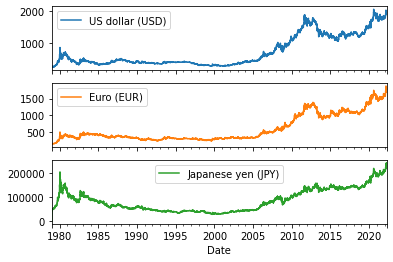

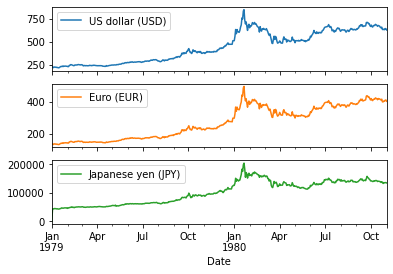

In [621]:
plot_cols = ['US dollar (USD)', 'Euro (EUR)', 'Japanese yen (JPY)']
plot_features = df[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)

plot_features = df[plot_cols][:480]
plot_features.index = date_time[:480]
_ = plot_features.plot(subplots=True)

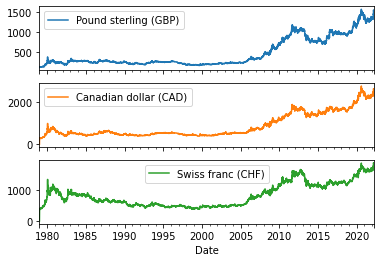

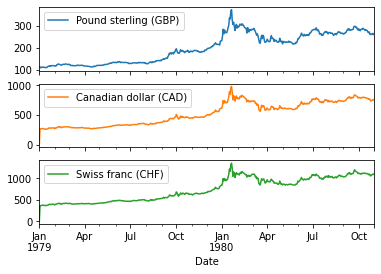

In [622]:
plot_cols = ['Pound sterling (GBP)', 'Canadian dollar (CAD)', 'Swiss franc (CHF)']
plot_features = df[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)

plot_features = df[plot_cols][:480]
plot_features.index = date_time[:480]
_ = plot_features.plot(subplots=True)

#### Scatter Plot

''

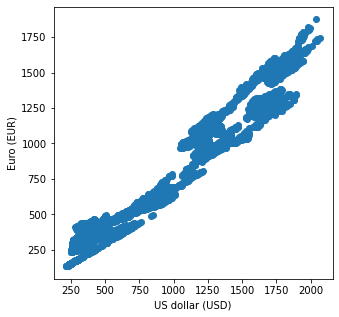

In [623]:
# useful for identifying relationship (i.e. correlation) between two parameters
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(df['US dollar (USD)'], df['Euro (EUR)'])
ax.set_xlabel('US dollar (USD)')
ax.set_ylabel('Euro (EUR)')
,

''

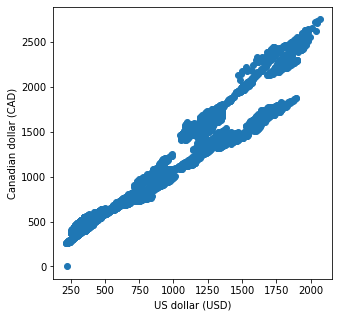

In [624]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(df['US dollar (USD)'], df['Canadian dollar (CAD)'])
ax.set_xlabel('US dollar (USD)')
ax.set_ylabel('Canadian dollar (CAD)')
,

''

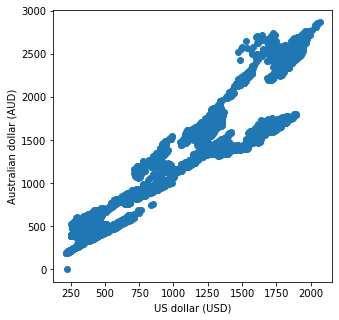

In [625]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(df['US dollar (USD)'], df['Australian dollar (AUD)'])
ax.set_xlabel('US dollar (USD)')
ax.set_ylabel('Australian dollar (AUD)')
,

#### Histogram

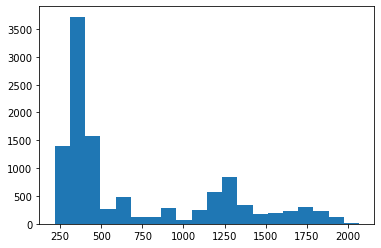

In [626]:
# useful for visualizing the distribution of the data
testCol = df['US dollar (USD)'].values
testCol
testHist = np.asarray(testCol, dtype='float')
plt.hist(testHist, bins = 20)
plt.show()

### Adjustments from Exploratory Data Analysis.

During Exploratory Data Analysis, I noticed some of the features are not relevant for the purposes of this project. That being said, we can remove some of them.

Now we observe how our features correlate with each other and with the target variable, complication:

''

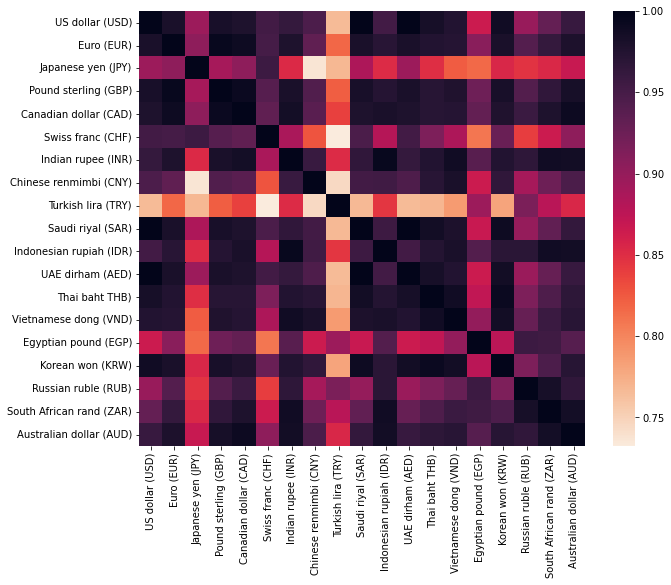

In [627]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(df.corr().abs(),annot=False, ax=ax, cmap='rocket_r')
,

In [628]:
# feature correlation with target variable
df.corr()['US dollar (USD)'].sort_values(ascending=False)

US dollar (USD)             1.000000
UAE dirham (AED)            0.999963
Saudi riyal (SAR)           0.999562
Korean won (KRW)            0.987579
Thai baht THB)              0.984133
Pound sterling (GBP)        0.982298
Euro (EUR)                  0.981771
Canadian dollar (CAD)       0.978180
Vietnamese dong (VND)       0.975382
Indian rupee (INR)          0.963348
Australian dollar (AUD)     0.961157
Indonesian rupiah (IDR)     0.953793
Swiss franc (CHF)           0.953682
Chinese renmimbi (CNY)      0.946250
South African rand (ZAR)    0.930007
Russian ruble (RUB)         0.897597
Japanese yen (JPY)          0.895749
Egyptian pound (EGP)        0.865541
Turkish lira (TRY)          0.766867
Name: US dollar (USD), dtype: float64

In [629]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11290 entries, 0 to 11289
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   US dollar (USD)           11290 non-null  float64
 1   Euro (EUR)                11290 non-null  float64
 2   Japanese yen (JPY)        11290 non-null  float64
 3   Pound sterling (GBP)      11290 non-null  float64
 4   Canadian dollar (CAD)     11290 non-null  float64
 5   Swiss franc (CHF)         11290 non-null  float64
 6   Indian rupee (INR)        11290 non-null  float64
 7   Chinese renmimbi (CNY)    11290 non-null  float64
 8   Turkish lira (TRY)        11290 non-null  float64
 9   Saudi riyal (SAR)         11290 non-null  float64
 10  Indonesian rupiah (IDR)   11290 non-null  float64
 11  UAE dirham (AED)          11290 non-null  float64
 12  Thai baht THB)            11290 non-null  float64
 13  Vietnamese dong (VND)     11290 non-null  float64
 14  Egypti

In [630]:
timestamp_s = date_time.map(pd.Timestamp.timestamp)

### Data Preparation

The data preparation is key to feeding the data into the RNN models. A large portion of this preparation is taken from the implementation provided by the official [TensorFlow page](https://www.tensorflow.org/tutorials/structured_data/time_series#data_windowing) on time-series forecasting, mainly concerning the Data Windowing section.

#### Train-Dev-Test Split

In [631]:
# divide data into train and test sets
# we will use an 80-10-10 train-val-test split
column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
# We do not shuffle the data prior to splitting because we want to
# split the data into windows that consecutively sample the data
train_df = df[0:int(n*0.8)]
val_df = df[int(n*0.8):int(n*0.9)]
test_df = df[int(n*0.9):]

num_features = df.shape[1]

In [632]:
# scaler = StandardScaler()
# train_scale = scaler.fit_transform(train_df)
# test_scale = scaler.fit_transform(test_df)
# val_scale = scaler.fit_transform(val_df)

In [633]:
train_mean = train_df.mean()
train_std = train_df.std()

In [634]:
# We must use traditional normalization instead of a StandardScalar
# According to the TensorFlow article, we must compute the mean and
# standard deviation from the training data so the models cannot be
# biased from using values present in the val and test sets

train_scale_df = (train_df - train_mean) / train_std
val_scale_df = (val_df - train_mean) / train_std
test_scale_df = (test_df - train_mean) / train_std

# train_scale_df = pd.DataFrame(train_scale, index=train_df.index, columns=train_df.columns)
# test_scale_df = pd.DataFrame(test_scale, index=test_df.index, columns=test_df.columns)
# val_scale_df = pd.DataFrame(val_scale, index=val_df.index, columns=val_df.columns)

In [635]:
train_df.head()

,US dollar (USD),Euro (EUR),Japanese yen (JPY),Pound sterling (GBP),Canadian dollar (CAD),Swiss franc (CHF),Indian rupee (INR),Chinese renmimbi (CNY),Turkish lira (TRY),Saudi riyal (SAR),Indonesian rupiah (IDR),UAE dirham (AED),Thai baht THB),Vietnamese dong (VND),Egyptian pound (EGP),Korean won (KRW),Russian ruble (RUB),South African rand (ZAR),Australian dollar (AUD)
0,226.00,137.06,0.00,110.70,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.00
1,226.80,137.29,43164.91,111.45,263.74,359.62,1792.85,0.0,0.0,735.60,138160.45,851.29,4454.55,0.0,0.0,107470.04,0.0,194.56,193.61
2,218.60,134.01,43717.90,107.98,264.39,365.87,1802.15,0.0,0.0,739.42,138877.01,855.71,4477.66,0.0,0.0,108027.43,0.0,192.23,192.97
3,223.15,136.79,43674.89,110.66,264.14,366.38,1811.74,0.0,0.0,743.36,139616.26,860.26,4501.49,0.0,0.0,108602.47,0.0,193.01,194.55
4,225.50,138.35,44582.47,111.63,268.39,373.72,1843.57,0.0,0.0,756.42,142069.10,875.38,4580.57,0.0,0.0,110510.44,0.0,196.40,197.94


In [636]:
train_scale_df.head()

,US dollar (USD),Euro (EUR),Japanese yen (JPY),Pound sterling (GBP),Canadian dollar (CAD),Swiss franc (CHF),Indian rupee (INR),Chinese renmimbi (CNY),Turkish lira (TRY),Saudi riyal (SAR),Indonesian rupiah (IDR),UAE dirham (AED),Thai baht THB),Vietnamese dong (VND),Egyptian pound (EGP),Korean won (KRW),Russian ruble (RUB),South African rand (ZAR),Australian dollar (AUD)
0,-0.849765,-1.147593,-2.087464,-0.923628,-1.891402,-2.374232,-0.885510,-1.105766,-0.591412,-1.439999,-0.777544,-1.468682,-1.377367,-0.726397,-0.771386,-1.180729,-0.65757,-0.835486,-1.906304
1,-0.847581,-1.146705,-0.752018,-0.920397,-1.106621,-1.180816,-0.802919,-1.105766,-0.591412,-0.907128,-0.745288,-0.835568,-1.001669,-0.726397,-0.771386,-0.939383,-0.65757,-0.780841,-1.339395
2,-0.869974,-1.159366,-0.734910,-0.935347,-1.104687,-1.160075,-0.802490,-1.105766,-0.591412,-0.904361,-0.745121,-0.832280,-0.999720,-0.726397,-0.771386,-0.938131,-0.65757,-0.781496,-1.341269
3,-0.857548,-1.148635,-0.736240,-0.923801,-1.105431,-1.158383,-0.802048,-1.105766,-0.591412,-0.901506,-0.744948,-0.828896,-0.997710,-0.726397,-0.771386,-0.936840,-0.65757,-0.781277,-1.336643
4,-0.851131,-1.142613,-0.708161,-0.919622,-1.092785,-1.134025,-0.800582,-1.105766,-0.591412,-0.892046,-0.744376,-0.817652,-0.991040,-0.726397,-0.771386,-0.932555,-0.65757,-0.780325,-1.326717


#### Data Windowing

In [637]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_scale_df=train_scale_df, val_scale_df=val_scale_df, test_scale_df=test_scale_df,
               label_columns=None):
    # Store the raw data.
    self.train_scale_df = train_scale_df
    self.val_scale_df = val_scale_df
    self.test_scale_df = test_scale_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

In [638]:
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [639]:
def plot(self, model=None, plot_col='US dollar (USD)', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normalized]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Day')

WindowGenerator.plot = plot

In [640]:
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.utils.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

In [641]:
@property
def train(self):
  return self.make_dataset(self.train_scale_df)

@property
def val(self):
  return self.make_dataset(self.val_scale_df)

@property
def test(self):
  return self.make_dataset(self.test_scale_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

### Single-Step Models

For the single-step model, I wanted to view how accurate the RNN models would be in predicting the next day's gold value given a previous months' worth of data. 30 days are used for the input as that is the average length of a month.

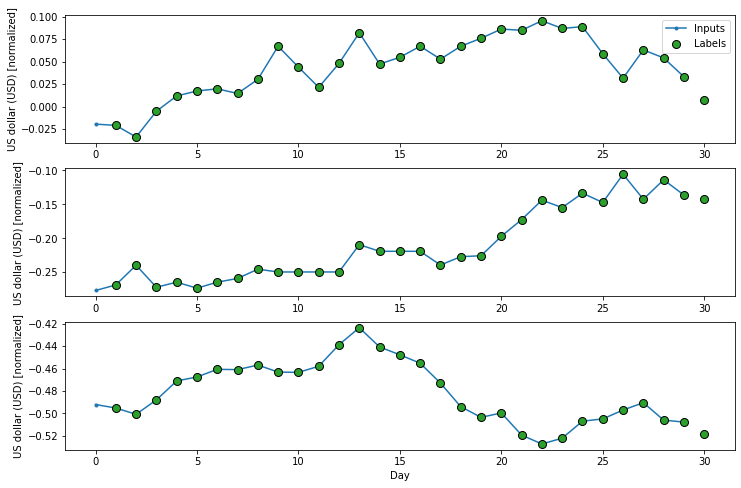

In [642]:
wide_window = WindowGenerator(
    input_width=30, label_width=30, shift=1,
    label_columns=['US dollar (USD)'])

wide_window.plot()

In [643]:
wide_window

Total window size: 31
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]
Label column name(s): ['US dollar (USD)']

#### Simple RNN

Implementation of this RNN came courtesy of TensorFlow and Keras. I based this network in part on the initial implementation I used in the previous homework. This setup uses one hidden 128-node SimpleRNN layer and one Dense output layer. `return_sequences = True` allows the model to return all the calculated labels, which will be critical in assessing how the model reaches its final forecast. I will use the default activation functions. For SimpleRNN, this is tanh, and for Dense, this is linear (no modification). The model's performance will be measured by Mean Absolute Error because it is less prone to outliers in the data and can measure how far off the predictions are from the ground truths.

In [644]:
modelSimpleRNN = tf.keras.Sequential([
    layers.SimpleRNN(128, return_sequences=True),
    layers.Dense(units=1)
])

In [645]:
# We will call early stopping in case we begin overfitting
# Source: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=2,
                                                    mode='min')

modelSimpleRNN.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[tf.keras.metrics.MeanAbsoluteError()])

historySimpleRNN = modelSimpleRNN.fit(wide_window.train, epochs=30,
                      validation_data=wide_window.val,
                      callbacks=[early_stopping])

Epoch 1/30
282/282 [==============================] - 8s 21ms/step - loss: 0.0081 - mean_absolute_error: 0.0485 - val_loss: 0.0076 - val_mean_absolute_error: 0.0645
Epoch 2/30
282/282 [==============================] - 4s 12ms/step - loss: 0.0011 - mean_absolute_error: 0.0211 - val_loss: 0.0081 - val_mean_absolute_error: 0.0730
Epoch 3/30
282/282 [==============================] - 3s 12ms/step - loss: 0.0011 - mean_absolute_error: 0.0230 - val_loss: 0.0037 - val_mean_absolute_error: 0.0413
Epoch 4/30
282/282 [==============================] - 3s 12ms/step - loss: 8.7473e-04 - mean_absolute_error: 0.0193 - val_loss: 0.0099 - val_mean_absolute_error: 0.0849
Epoch 5/30
282/282 [==============================] - 3s 12ms/step - loss: 7.6675e-04 - mean_absolute_error: 0.0178 - val_loss: 0.0226 - val_mean_absolute_error: 0.1393


In [646]:
IPython.display.clear_output()

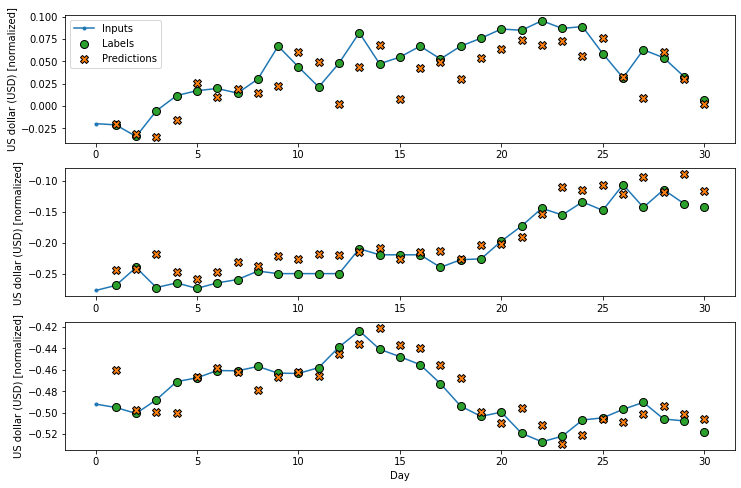

In [647]:
wide_window.plot(modelSimpleRNN)

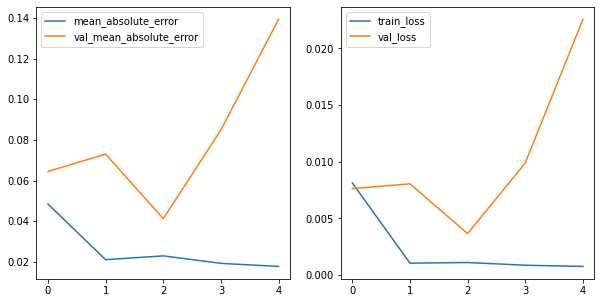

In [648]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
ax[0].plot(historySimpleRNN.history['mean_absolute_error'])
ax[0].plot(historySimpleRNN.history['val_mean_absolute_error'])
ax[0].legend(['mean_absolute_error', 'val_mean_absolute_error'])
ax[1].plot(historySimpleRNN.history['loss'])
ax[1].plot(historySimpleRNN.history['val_loss'])
ax[1].legend(['train_loss', 'val_loss'])
plt.show()

In [649]:
modelSimpleRNN.evaluate(wide_window.val)

35/35 [==============================] - 0s 6ms/step - loss: 0.0226 - mean_absolute_error: 0.1393


[0.02256694622337818, 0.13927817344665527]

In [650]:
modelSimpleRNN.evaluate(wide_window.test)

35/35 [==============================] - 0s 6ms/step - loss: 2.1185 - mean_absolute_error: 1.2521


[2.118527889251709, 1.2520532608032227]

#### LSTM

In [651]:
modelLSTM = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(128, return_sequences=True),
    tf.keras.layers.Dense(units=1)
])

In [652]:
modelLSTM.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[tf.keras.metrics.MeanAbsoluteError()])

historyLSTM = modelLSTM.fit(wide_window.train, epochs=40,
                      validation_data=wide_window.val,
                      callbacks=[early_stopping])

Epoch 1/40
282/282 [==============================] - 14s 37ms/step - loss: 0.0245 - mean_absolute_error: 0.0677 - val_loss: 0.1631 - val_mean_absolute_error: 0.3082
Epoch 2/40
282/282 [==============================] - 10s 34ms/step - loss: 0.0022 - mean_absolute_error: 0.0280 - val_loss: 0.0957 - val_mean_absolute_error: 0.1958
Epoch 3/40
282/282 [==============================] - 11s 38ms/step - loss: 0.0014 - mean_absolute_error: 0.0227 - val_loss: 0.0874 - val_mean_absolute_error: 0.1870
Epoch 4/40
282/282 [==============================] - 10s 34ms/step - loss: 0.0011 - mean_absolute_error: 0.0204 - val_loss: 0.0672 - val_mean_absolute_error: 0.1622
Epoch 5/40
282/282 [==============================] - 10s 34ms/step - loss: 9.6659e-04 - mean_absolute_error: 0.0189 - val_loss: 0.0476 - val_mean_absolute_error: 0.1380
Epoch 6/40
282/282 [==============================] - 10s 34ms/step - loss: 9.0590e-04 - mean_absolute_error: 0.0184 - val_loss: 0.0462 - val_mean_absolute_error: 0.1

In [653]:
IPython.display.clear_output()

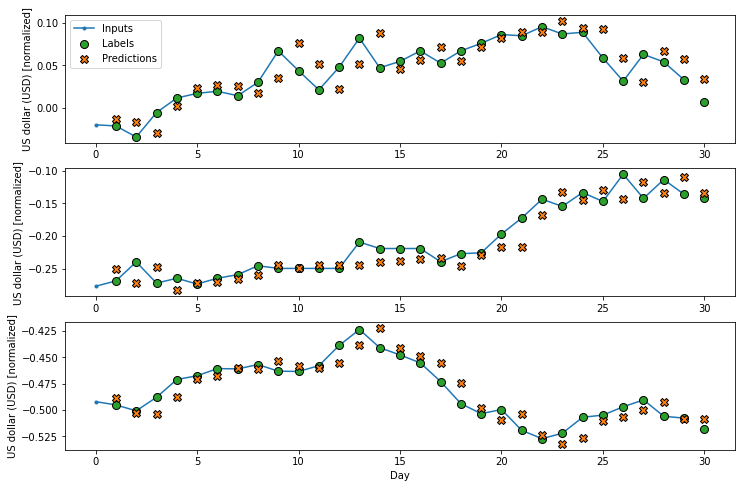

In [654]:
wide_window.plot(modelLSTM)

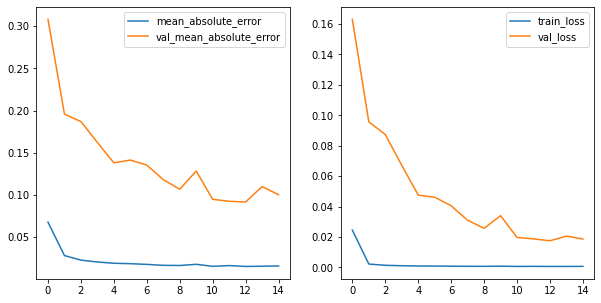

In [655]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
ax[0].plot(historyLSTM.history['mean_absolute_error'])
ax[0].plot(historyLSTM.history['val_mean_absolute_error'])
ax[0].legend(['mean_absolute_error', 'val_mean_absolute_error'])
ax[1].plot(historyLSTM.history['loss'])
ax[1].plot(historyLSTM.history['val_loss'])
ax[1].legend(['train_loss', 'val_loss'])
plt.show()

In [656]:
modelLSTM.evaluate(wide_window.val)

35/35 [==============================] - 1s 13ms/step - loss: 0.0187 - mean_absolute_error: 0.1002


[0.018687603995203972, 0.10020451992750168]

In [657]:
modelLSTM.evaluate(wide_window.test)

35/35 [==============================] - 1s 14ms/step - loss: 0.3743 - mean_absolute_error: 0.4613


[0.37431198358535767, 0.46133196353912354]

#### GRU

In [658]:
modelGRU = tf.keras.models.Sequential([
    tf.keras.layers.GRU(128, return_sequences=True),
    tf.keras.layers.Dense(units=1)
])

In [659]:
modelGRU.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[tf.keras.metrics.MeanAbsoluteError()])

historyGRU = modelGRU.fit(wide_window.train, epochs=40,
                      validation_data=wide_window.val,
                      callbacks=[early_stopping])

Epoch 1/40
282/282 [==============================] - 10s 27ms/step - loss: 0.0152 - mean_absolute_error: 0.0596 - val_loss: 0.1052 - val_mean_absolute_error: 0.2120
Epoch 2/40
282/282 [==============================] - 7s 26ms/step - loss: 0.0013 - mean_absolute_error: 0.0243 - val_loss: 0.0666 - val_mean_absolute_error: 0.1836
Epoch 3/40
282/282 [==============================] - 7s 26ms/step - loss: 9.6525e-04 - mean_absolute_error: 0.0192 - val_loss: 0.0530 - val_mean_absolute_error: 0.1582
Epoch 4/40
282/282 [==============================] - 7s 26ms/step - loss: 8.2844e-04 - mean_absolute_error: 0.0174 - val_loss: 0.0366 - val_mean_absolute_error: 0.1319
Epoch 5/40
282/282 [==============================] - 7s 26ms/step - loss: 7.6152e-04 - mean_absolute_error: 0.0167 - val_loss: 0.0267 - val_mean_absolute_error: 0.1142
Epoch 6/40
282/282 [==============================] - 7s 26ms/step - loss: 7.3105e-04 - mean_absolute_error: 0.0164 - val_loss: 0.0238 - val_mean_absolute_error: 

In [660]:
IPython.display.clear_output()

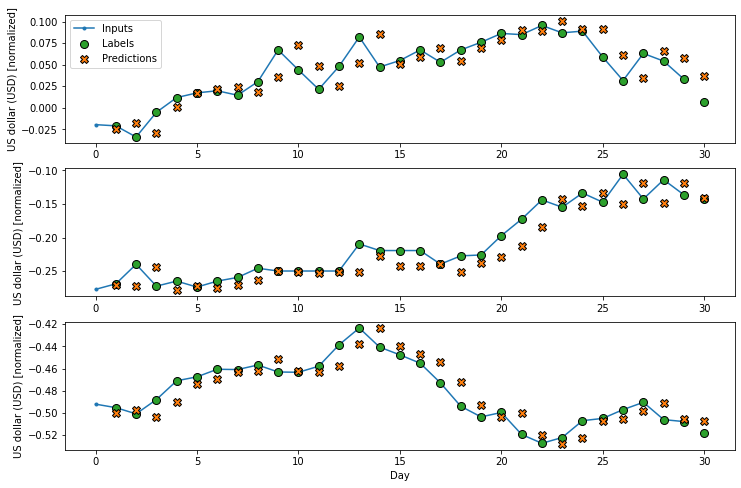

In [661]:
wide_window.plot(modelGRU)

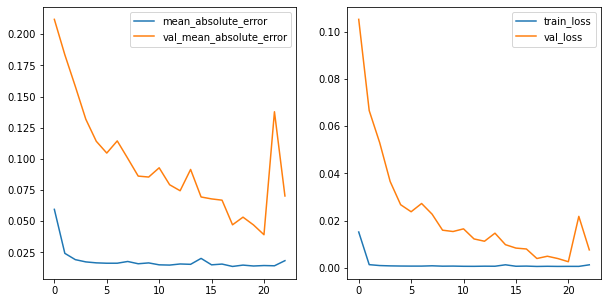

In [662]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
ax[0].plot(historyGRU.history['mean_absolute_error'])
ax[0].plot(historyGRU.history['val_mean_absolute_error'])
ax[0].legend(['mean_absolute_error', 'val_mean_absolute_error'])
ax[1].plot(historyGRU.history['loss'])
ax[1].plot(historyGRU.history['val_loss'])
ax[1].legend(['train_loss', 'val_loss'])
plt.show()

In [663]:
modelGRU.evaluate(wide_window.val)

35/35 [==============================] - 0s 9ms/step - loss: 0.0076 - mean_absolute_error: 0.0703


[0.0075979894027113914, 0.07029878348112106]

In [664]:
modelGRU.evaluate(wide_window.test)

35/35 [==============================] - 0s 9ms/step - loss: 0.4086 - mean_absolute_error: 0.4305


[0.40863296389579773, 0.4304540157318115]

### Results for Implementations

| **Implementation**  | **Validation Loss** | **Validation MAE** | **Test Loss** | **Test MAE** |
|-----------|---------------------|--------------------|---------------|--------------|
| SimpleRNN | 0.0226              | 0.1393             | 2.1185        | 1.2521       |
| LSTM      | 0.0187              | 0.1002             | 0.3743        | 0.4613       |
| GRU       | 0.0076              | 0.0703             | 0.4086        | 0.4305       |

The major difference I first notice is losses and MAEs are much lower with the LSTM and GRU implementations than they are with the SimpleRNN implementation. This could be due to how the SimpleRNN naturally suffers from a short-term memory, which the LSTM and GRU implementations solve. Of these, the SimpleRNN ran for the least epochs, far less than what LSTM and GRU managed. This may also pertain to the short-term memory issue, with its poor predictive powers contributing to it not learning the dataset as effectively. It makes mistakes that then trigger the early stopping, which leaves it with its poor performance.

LSTM and GRU are intended to solve the short-term memory issue. They certainly do, but GRU performs significantly better in both the val loss and MAE. The LSTM can keep and forget information through a memory mechanism while the GRU, as pointed out [here](https://towardsdatascience.com/illustrated-guide-to-lstms-and-gru-s-a-step-by-step-explanation-44e9eb85bf21), removes the cell's state to transfer information through the hidden state, featuring reset and update gates. Whether to use an LSTM or GRU is a problem-specific decision, and considering how much better the GRU performs than the LSTM on validation, even if it performs worse on the test set, we want to focus on validation so we do not create a biased model. Thus, I would select the GRU implentation as the best to use for this problem.

For all three of the implementations, the test loss and test MAE are greater than the validation loss and MAE. I believe this is the case because the test set predominantly consists of data that is increasing at a rapid rate. The validation set captures some increases, but it also captures a large slump. The train set mainly consists of calmer data with some increases and decreases toward the beginning and a larger rise toward the end. I believe this is due to the data because I tried both 70-20-10 and 80-10-10 splits for train-val-test, and the same issue persisted. It is as if the model eventually expects the value to fall when instead, it keeps rising.

### Is Feed-Forward Possible?

It is possible to use a feed-forward network to solve problems involving time-series data. As explained in [this article](https://machinelearningmastery.com/promise-recurrent-neural-networks-time-series-forecasting/#:~:text=For%20these%20capabilities%20alone%2C%20feed-forward%20neural%20networks%20are,meaningful%20mapping%20from%20inputs%20to%20outputs%20to%20learn.), feed-forward networks can support a specified number of inputs and outputs. So long as one specifies how many inputs there are, one can include the time series data. This would be done by converting the date and time into a general time feature with common units like hours, days, or months. Specifying a number of inputs lets the feed-forward network support multivariate inputs and forecasting. Specifying a number of outputs lets it support multi-step forecasting.

However, they do not perform as well with time-series data as RNNs because when designing the model, we need to specify how the data is dependent on time. We must use a fixed number of inputs and can only return one output for each input configuration. Every time we wish to vary the number of inputs, we must reconfigure the model to accept those new inputs.

### Pre-Trained Word Embedding

I used the GloVe Wikipedia 2014 + Gigaword 5 [pre-trained word vector](https://nlp.stanford.edu/projects/glove/) with 50 dimensions because it was a reasonably large dimensionality for this task.

In [665]:
# Convert to word2vec code - https://radimrehurek.com/gensim/scripts/glove2word2vec.html
glovef = datapath('/content/glove.6B.50d.txt')
temp = get_tmpfile('w2v.txt')

_ = glove2word2vec(glovef, temp)

model = KeyedVectors.load_word2vec_format(temp)

In [666]:
model['apple']

array([ 0.52042 , -0.8314  ,  0.49961 ,  1.2893  ,  0.1151  ,  0.057521,
       -1.3753  , -0.97313 ,  0.18346 ,  0.47672 , -0.15112 ,  0.35532 ,
        0.25912 , -0.77857 ,  0.52181 ,  0.47695 , -1.4251  ,  0.858   ,
        0.59821 , -1.0903  ,  0.33574 , -0.60891 ,  0.41742 ,  0.21569 ,
       -0.07417 , -0.5822  , -0.4502  ,  0.17253 ,  0.16448 , -0.38413 ,
        2.3283  , -0.66682 , -0.58181 ,  0.74389 ,  0.095015, -0.47865 ,
       -0.84591 ,  0.38704 ,  0.23693 , -1.5523  ,  0.64802 , -0.16521 ,
       -1.4719  , -0.16224 ,  0.79857 ,  0.97391 ,  0.40027 , -0.21912 ,
       -0.30938 ,  0.26581 ], dtype=float32)

In [667]:
# Prompt for first input
wordA = input("First word: ").strip()
wordA

First word: a


'a'

In [668]:
# Prompt for second input
wordB = input("Second word: ").strip()
wordB

Second word: an


'an'

In [669]:
# Seach for words' corresponding vectors
w2vA = model[wordA]
w2vB = model[wordB]

In [670]:
# cosine similarity - https://www.geeksforgeeks.org/cosine-similarity/
cosSim = np.dot(w2vA, w2vB) / (np.linalg.norm(w2vA) * np.linalg.norm(w2vB))
cosSim

0.94896406

In [671]:
# cosine dissimilarity - https://www.geeksforgeeks.org/cosine-similarity/
disSim = 1 - cosSim
disSim

0.051035940647125244

The dissimilarity score I used is the one mentioned alongside cosine similarity on [GeeksforGeeks](https://www.geeksforgeeks.org/cosine-similarity/). As mentioned there, cosine similarity measures the angle between two vectors as a cosine of that angle. This angle represents similarity - 0 degrees (cos(0) = 1) means the word vectors are similar, while 90 degrees (cos(90) = 0) means the word vectors are not similar.

The dissimilarity score, meanwhile, is defined as 1 - cosine similarity. If the angle is 0 degrees, cosine similarity returns 1, and since 1 - 1 = 0, dissimilarity of 0 makes sense because the words are perfectly similar and not at all dissimilar. If the angle is 90 degrees, cosine similarity returns 0, and since 1 - 0 = 1, dissimilarity of 1 makes sense because the words are perfectly dissimilar and not at all similar. Where cosine similarity measures how close two words are to perfect similarity, dissimilarity measures how far apart the two words are from perfect similarity. This distance is a metric that represents how dissimilar these two words are.